# ANOVA | Analysis of variance

读取本节课的salary表格，进行方差分析，计算工资在同时受到经验（X），性别（M）和教育（E）的影响下，是否与这三个因素的大小都有关。可以用python自带的函数，或根据公式写出表达式并计算，并画图可视化工资与这三个变量的关系。

## 数据的可视化

In [90]:
%matplotlib inline
import pandas as pd
from urllib.request import urlopen
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

df = pd.read_csv("salary.csv")
print(df.info())
print(df.describe())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   S       46 non-null     int64 
 1   X       46 non-null     int64 
 2   E       46 non-null     object
 3   P       46 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.6+ KB
None
                  S          X
count     46.000000  46.000000
mean   17270.195652   7.500000
std     4716.631513   5.171503
min    10535.000000   1.000000
25%    13320.750000   3.000000
50%    16436.000000   6.000000
75%    20719.750000  11.000000
max    27837.000000  20.000000


,S,X,E,P
0,13876,1,B,M
1,11608,1,P,L
2,18701,1,P,M
3,11283,1,M,L
4,11767,1,P,L
5,20872,2,M,M
6,11772,2,M,L
7,10535,2,B,L
8,12195,2,P,L
9,12313,3,M,L


D:\TEMP\ipykernel_36076\1638997727.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#99c2a2'` for the same effect.

  sns.boxplot(data=df, x="E", y="S", hue="P", ax=ax[0],color='#99c2a2')
D:\TEMP\ipykernel_36076\1638997727.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#99c2a2'` for the same effect.

  sns.violinplot(data=df, x="E", y="S", hue="P", split=True, ax=ax[1],color='#99c2a2')


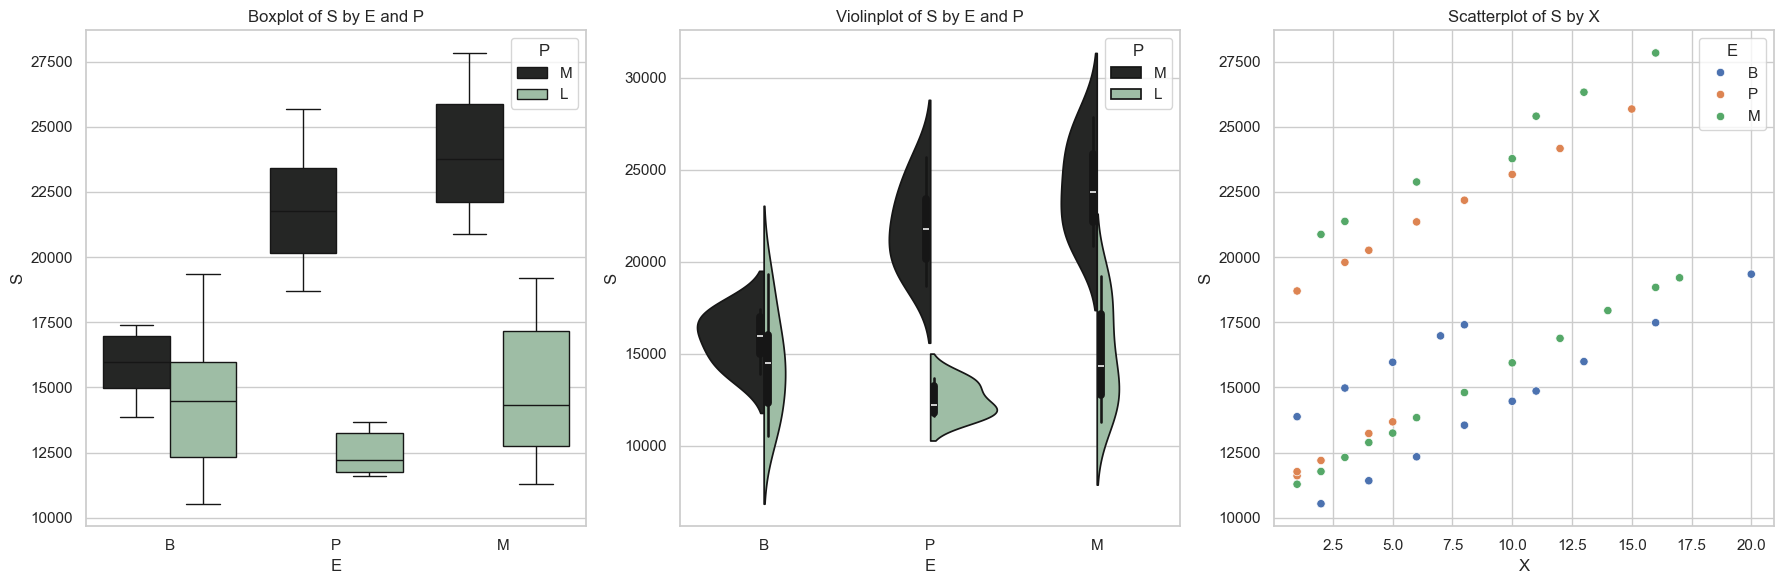

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(18, 6))

sns.boxplot(data=df, x="E", y="S", hue="P", ax=ax[0],color='#99c2a2')
ax[0].set_title("Boxplot of S by E and P")

sns.violinplot(data=df, x="E", y="S", hue="P", split=True, ax=ax[1],color='#99c2a2')
ax[1].set_title("Violinplot of S by E and P")



sns.scatterplot(data=df,y="S",x="X",hue="E",ax=ax[2],color='#99c2a2')
ax[2].set_title("Scatterplot of S by X")


plt.tight_layout()
plt.show()

下面的图像说明，不论性别与教育程度，工资都随着经验（X）的增加而增加，这符合常识

[seaborn.lmplot — seaborn 0.13.2 documentation](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

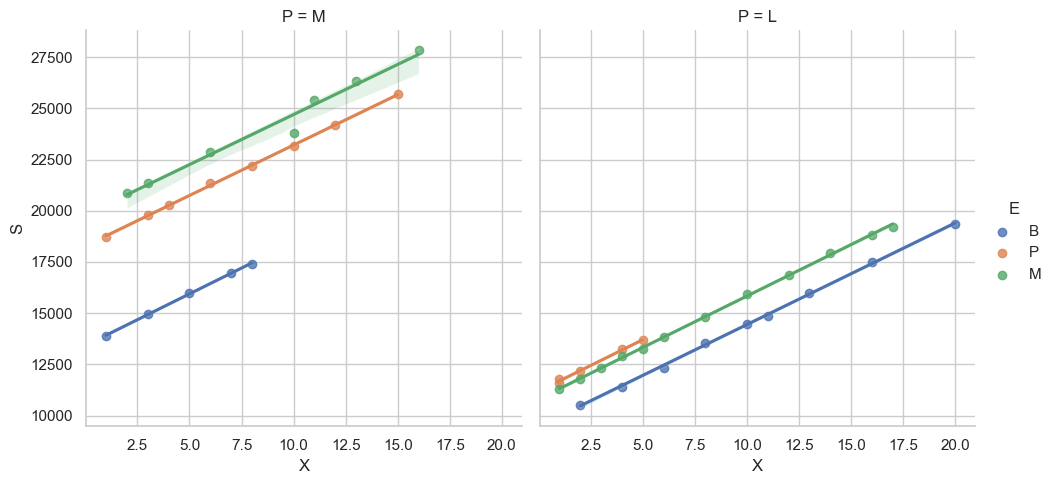

In [86]:
sns.lmplot(data=df, x="X", y="S", hue="E",col="P")
plt.show()

## 方差分析

In [105]:
# 单因素分析
import scipy.stats as st

print(st.f_oneway(*[salary_table['S'][salary_table['X'] == i] for i in set(df['X'])]))

# 下面两种方法是等价的，使用了python的列表生成式方法
print(st.f_oneway(*[salary_table['S'][salary_table['E'] == i] for i in set(df['E'])]))
print(st.f_oneway(salary_table['S'][salary_table['E'] == 'B'],
            salary_table['S'][salary_table['E'] == 'M'],
            salary_table['S'][salary_table['E'] == 'P']))

print(st.f_oneway(salary_table['S'][salary_table['P'] == 'L'],
            salary_table['S'][salary_table['P'] == 'M']))

F_onewayResult(statistic=np.float64(1.1790970944304695), pvalue=np.float64(0.3389898833663583))
F_onewayResult(statistic=np.float64(2.6305968530664803), pvalue=np.float64(0.08360139265047647))
F_onewayResult(statistic=np.float64(2.6305968530664794), pvalue=np.float64(0.08360139265047647))
F_onewayResult(statistic=np.float64(50.05876086474731), pvalue=np.float64(8.870138031216986e-09))


In [89]:
# 多因素分析
import scipy.stats as st
model = ols('S ~ C(E)+C(P)+C(X)', data=df).fit()
table = anova_lm(model)
print(table)

            df        sum_sq       mean_sq           F        PR(>F)
C(E)       2.0  1.091346e+08  5.456732e+07   55.135915  4.439912e-10
C(P)       1.0  5.105843e+08  5.105843e+08  515.904587  1.131966e-18
C(X)      16.0  3.556468e+08  2.222792e+07   22.459538  2.960936e-11
Residual  26.0  2.573187e+07  9.896874e+05         NaN           NaN


可以看出p值都是小于0.05的，说明同因素的不同水平对结果确实有影响